## Introduktion

 
Inom AI-utveckling handlar allt i grund och botten om att hitta minsta värden för vissa funktioner. 

För det ändamålet gick vi under senaste lektionen igenom den metod som används, för i princip all moden AI-utveckling, för att göra detta: **Gradient Descent**.

Syftet med följande uppgifter är att vi ska få en lite bättre känsla för hur Gradient Descent fungerar


_____

**Vad är Gradient Descent?**

Gradient Descent är en optimeringsmetod som används för att minimera en funktion genom att iterativt justera parametrarna. 

Den grundläggande idén är att vi vid varje iteration beräknar gradienten (derivatan) av funktionen, som visar oss vilken riktning vi ska röra vår oberoende variabel i, för att minska funktionsvärdet. 

I funktionen ovan är x vår oberoende variablen, och Vi uppdaterar vårt x-värde enligt följande formel:

$$
x_{\text{ny}} = x_{\text{gammal}} - \text{learning rate} \times \text{gradient}
$$
Genom att justera learning rate kan vi styra hur stora steg vi tar mot minimum.


_____

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Vi definierar först här en funktion som vi vill hitta minimum till. Specifikt vill vi hitta det x-värde som ger funktionens minsta värde. Vi definierar även funktionens derivata - den behövs för Gradient Descent.


In [8]:
def f(x):
    return x**2 - 4*x + 4

def f_derivative(x):
    return 2*x - 4


### Visualisering av Funktionen

Innan vi kör Gradient Descent, låt oss visualisera funktionen *f* för att se var minimum ligger.


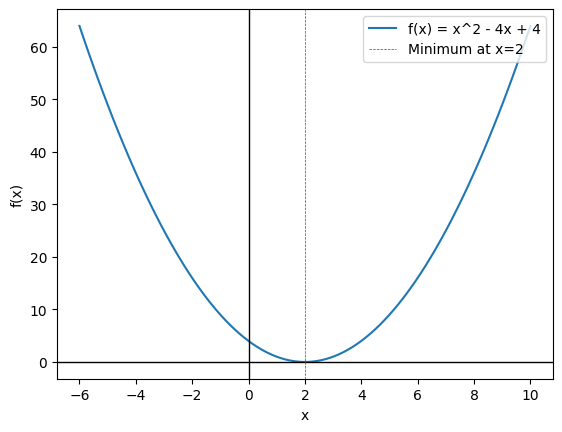

In [9]:
# Visualize the function
x_values = np.linspace(-6, 10, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x) = x^2 - 4x + 4')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.axvline(2, color='red', lw=0.5, ls='--', label='Minimum at x=2')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper right')
plt.show()


Vi ser här direkt via plotten att funktionen en har ett minimum vid x=2. Nu ska vi försöka hitta detta minimum automatiskt med hjälp av Gradient Descent.

_____

Låt oss nu definiera funktionen som utför Gradient Descent, vilket interativt hittar oss fram till det x-värde som ger oss minsta funktionsvärdet.

In [10]:
def gradient_descent(f, f_derivative, initial_x, learning_rate=0.1, iterations=1000):

    x = initial_x   # startvärdet av x
    x_values = []   # lista att samla alla värden av x

    for i in range(iterations):
        
        x_values.append(x)
        
        gradient = f_derivative(x)
        
        x = x - learning_rate * gradient

    # ------------ notera att följande endast är kod för som hanterar plotten, ej nödvändig för själva gradient descent ------------
        plt.figure(figsize=(10, 6))
        x_plot = np.linspace(np.abs(initial_x)+1, -np.abs(initial_x)-1, 100)
        plt.plot(x_plot, f(x_plot), label='f(x) = x^2 - 4x + 4', color='blue')
        plt.axhline(0, color='black', lw=1)
        plt.axvline(0, color='black', lw=1)
        plt.axvline(2, color='red', lw=0.5, ls='--', label='Minimum at x=2')

        # plot all previous x values
        plt.scatter(x_values, f(np.array(x_values)), color='orange', label='Previous x values')
        # Plot the current x value
        plt.scatter(x, f(x), color='green', label='Current x value', s=100)
        
        plt.title(f'Gradient Descent Iteration {i + 1}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()
    # ------------------------------------------------------------------------------------------------------------------------------

        if abs(gradient) < 0.005:   # bryt om ändringen i gradienten är mindre än ett visst tröskelvärde
            break
        
        print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}, gradient = {gradient}")
    
    return x

_____

**Problem 1**

Testa att köra funktionen *gradient_descent()* med olika värden på på *initial_x*. Börja med x=6 och testa sedan fler värden, både positiva och negativa.

Vad händer? Varför?

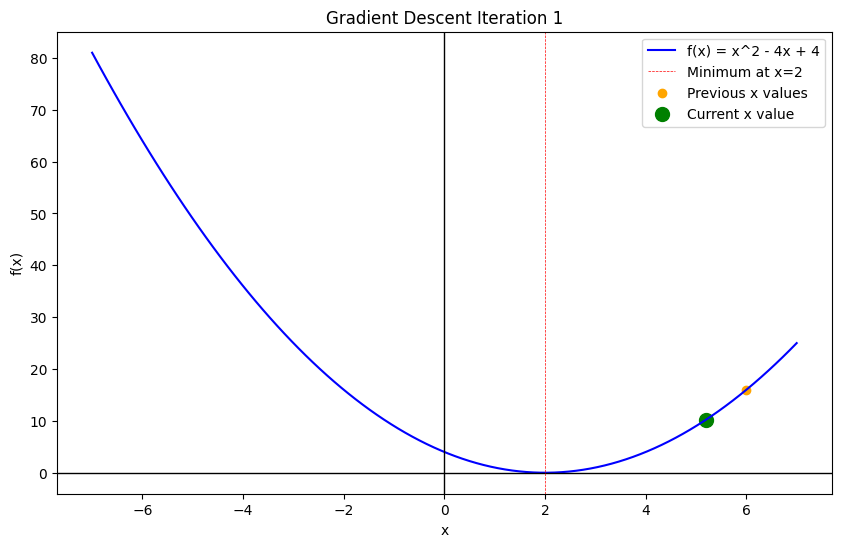

Iteration 1: x = 5.2, f(x) = 10.240000000000002, gradient = 8


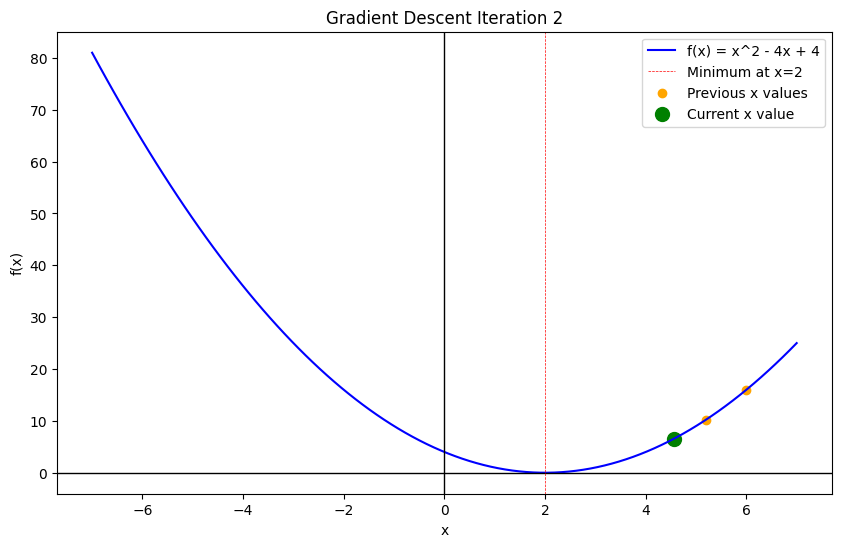

Iteration 2: x = 4.5600000000000005, f(x) = 6.553600000000003, gradient = 6.4


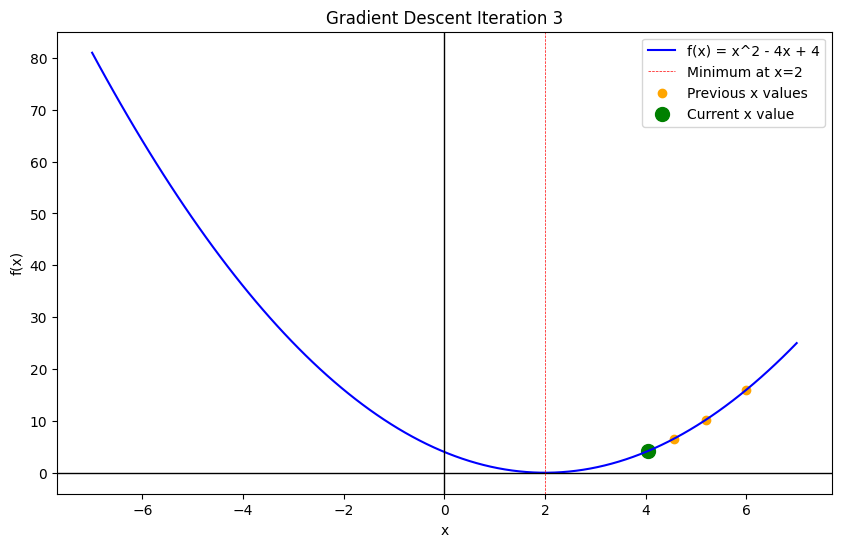

Iteration 3: x = 4.048, f(x) = 4.194303999999999, gradient = 5.120000000000001


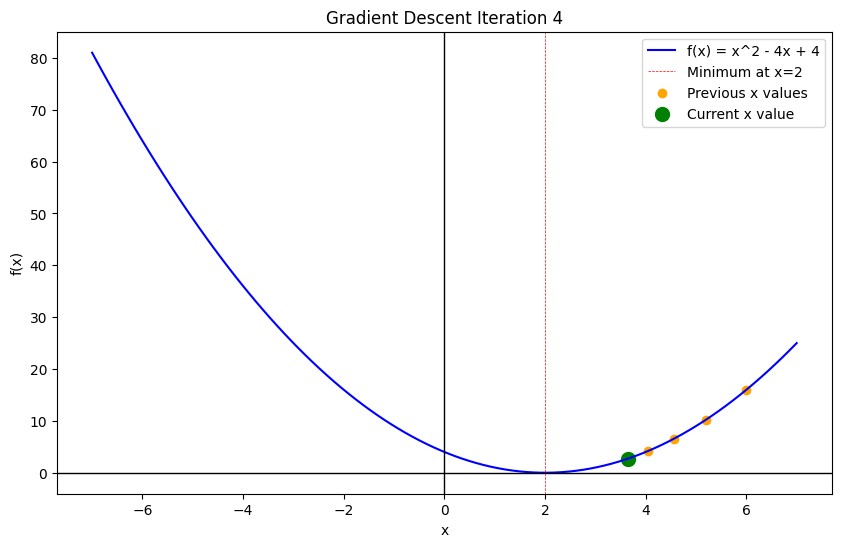

Iteration 4: x = 3.6384, f(x) = 2.684354559999999, gradient = 4.096


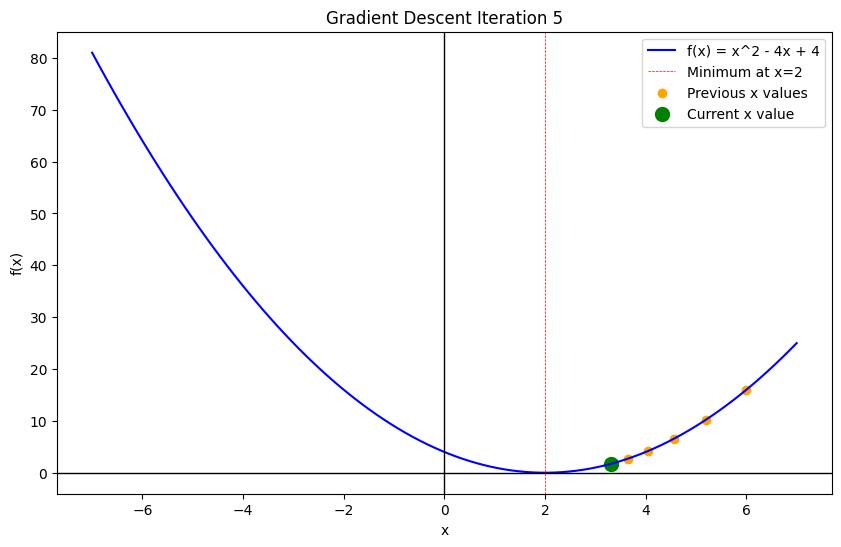

Iteration 5: x = 3.31072, f(x) = 1.7179869183999994, gradient = 3.2767999999999997


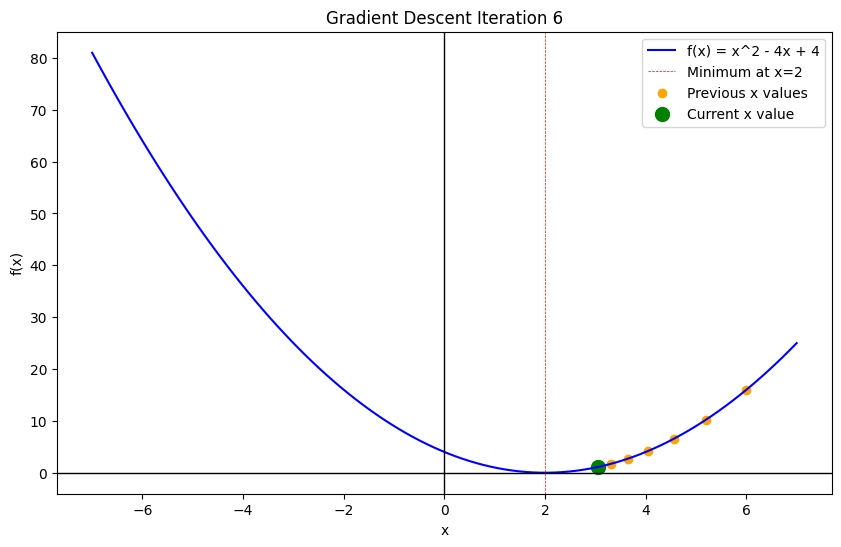

Iteration 6: x = 3.0485759999999997, f(x) = 1.0995116277759998, gradient = 2.6214399999999998


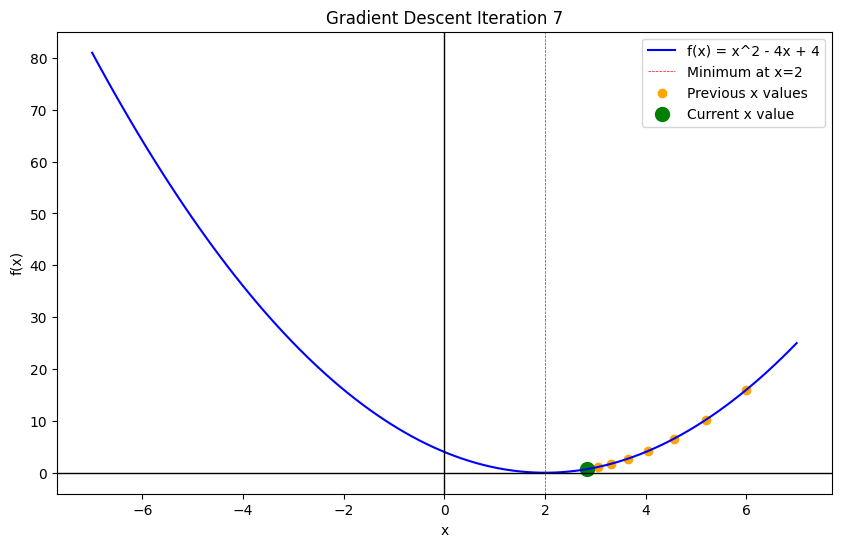

Iteration 7: x = 2.8388608, f(x) = 0.7036874417766406, gradient = 2.0971519999999995


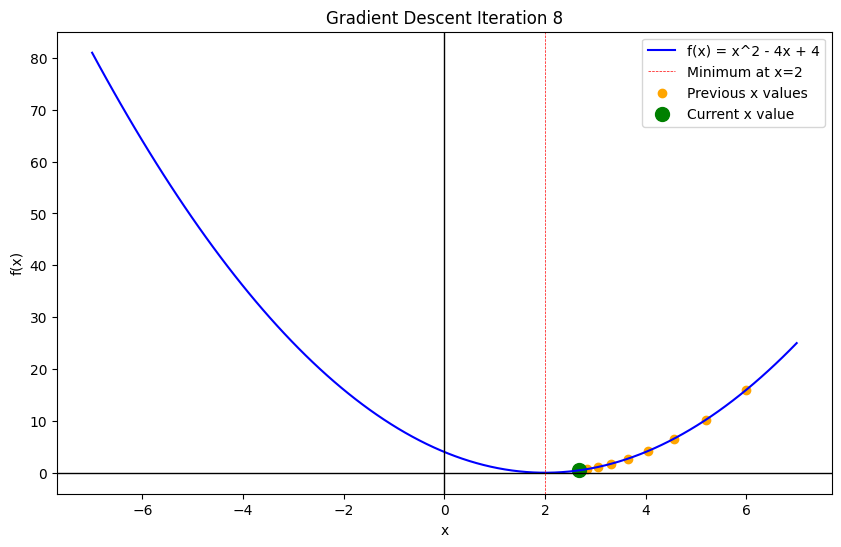

Iteration 8: x = 2.67108864, f(x) = 0.4503599627370489, gradient = 1.6777216


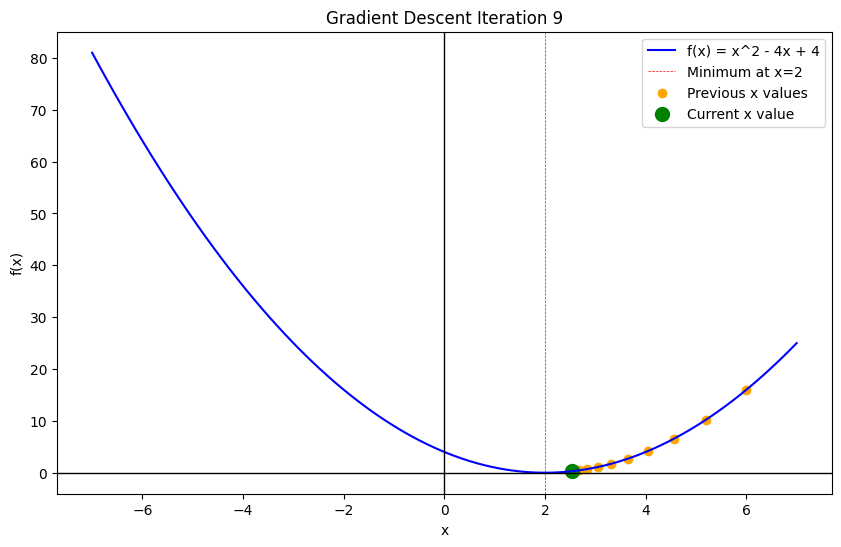

Iteration 9: x = 2.536870912, f(x) = 0.288230376151712, gradient = 1.3421772799999996


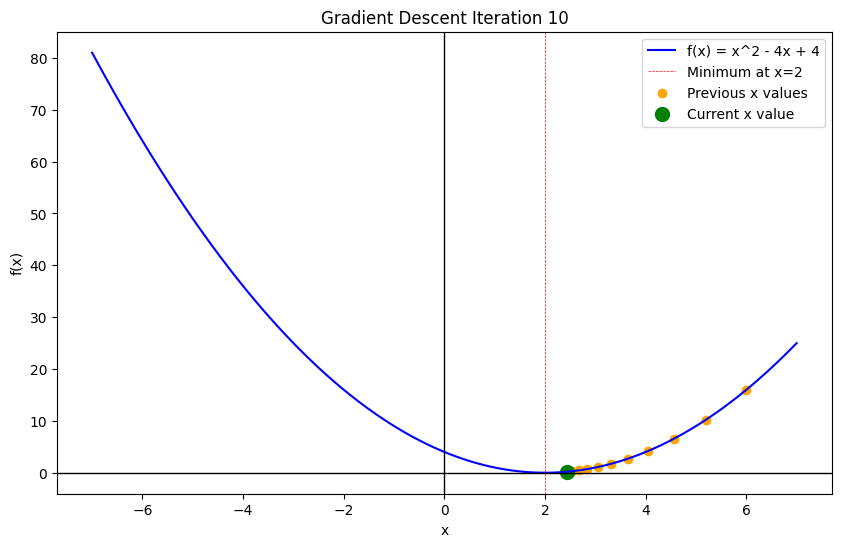

Iteration 10: x = 2.4294967296, f(x) = 0.18446744073709542, gradient = 1.0737418239999998


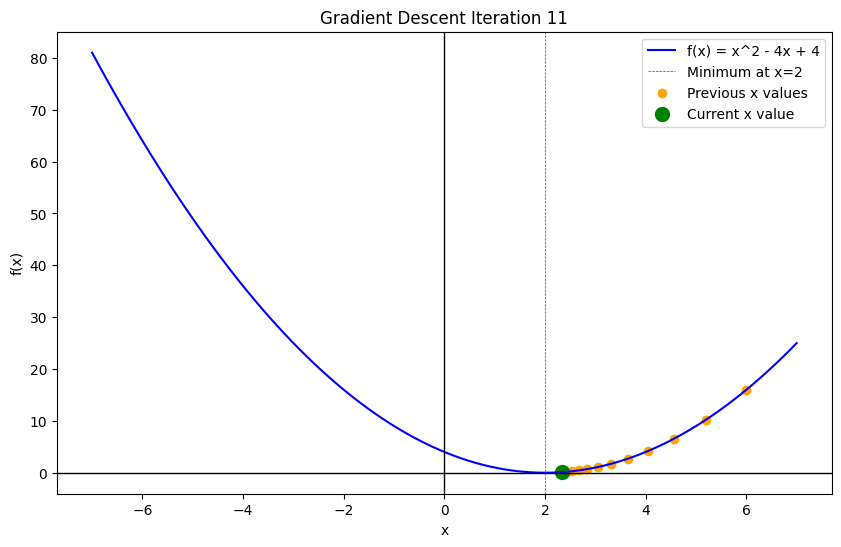

Iteration 11: x = 2.3435973836799997, f(x) = 0.11805916207174061, gradient = 0.8589934591999997


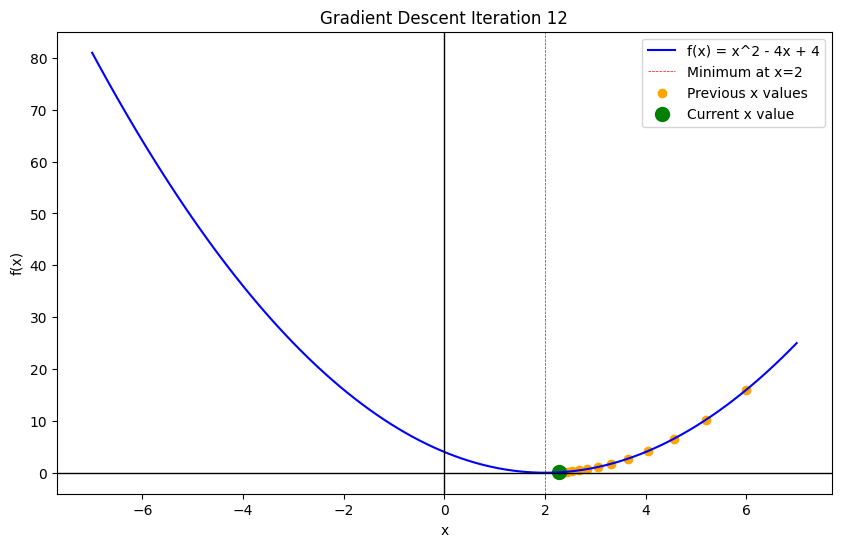

Iteration 12: x = 2.274877906944, f(x) = 0.07555786372591466, gradient = 0.6871947673599994


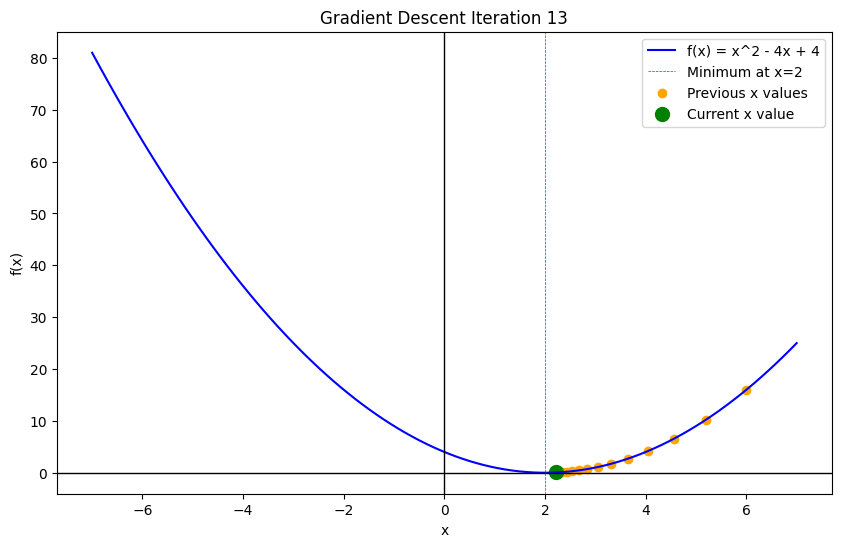

Iteration 13: x = 2.2199023255552, f(x) = 0.04835703278458503, gradient = 0.5497558138879999


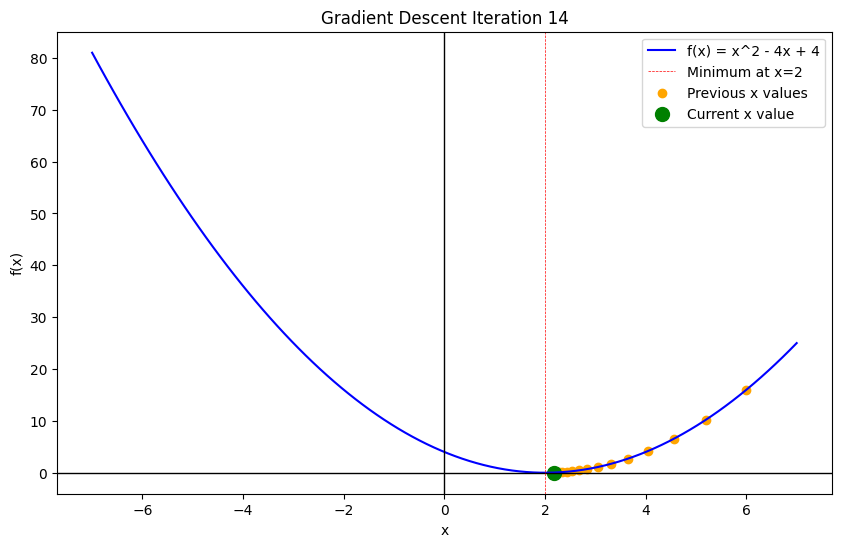

Iteration 14: x = 2.17592186044416, f(x) = 0.03094850098213442, gradient = 0.4398046511103999


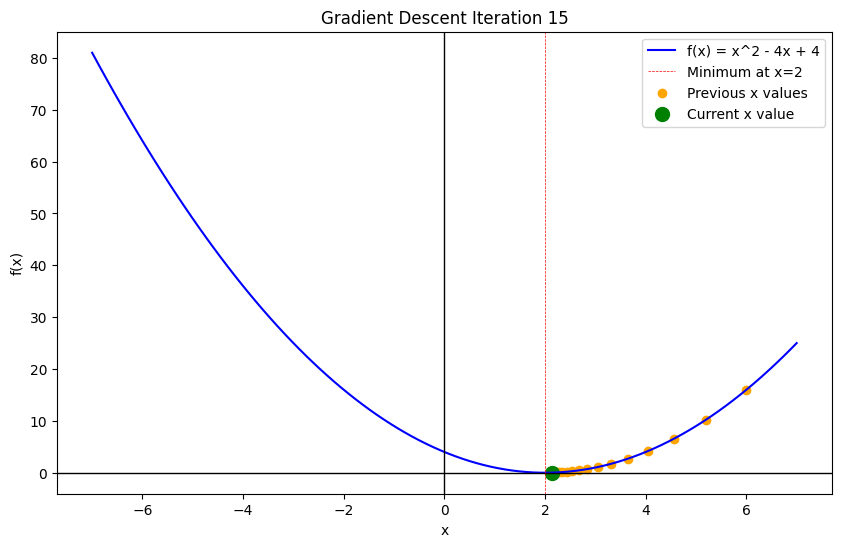

Iteration 15: x = 2.1407374883553283, f(x) = 0.01980704062856642, gradient = 0.3518437208883203


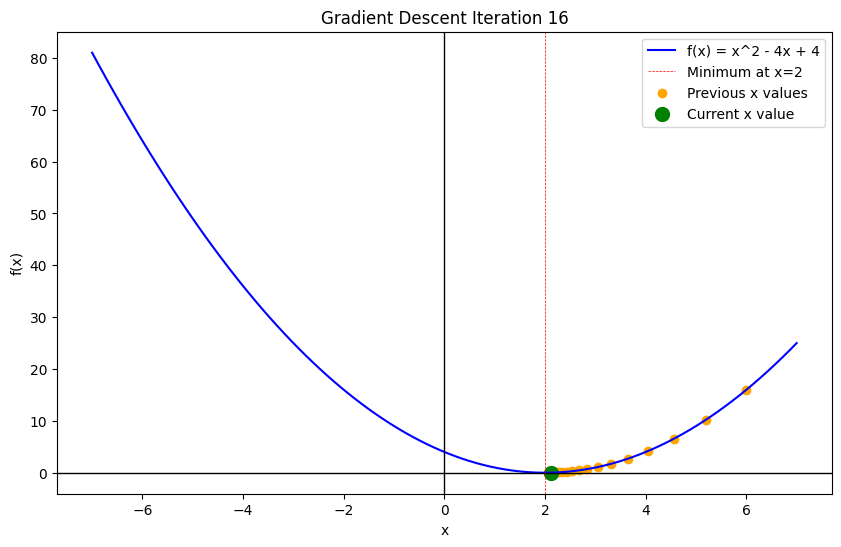

Iteration 16: x = 2.1125899906842625, f(x) = 0.01267650600228265, gradient = 0.2814749767106566


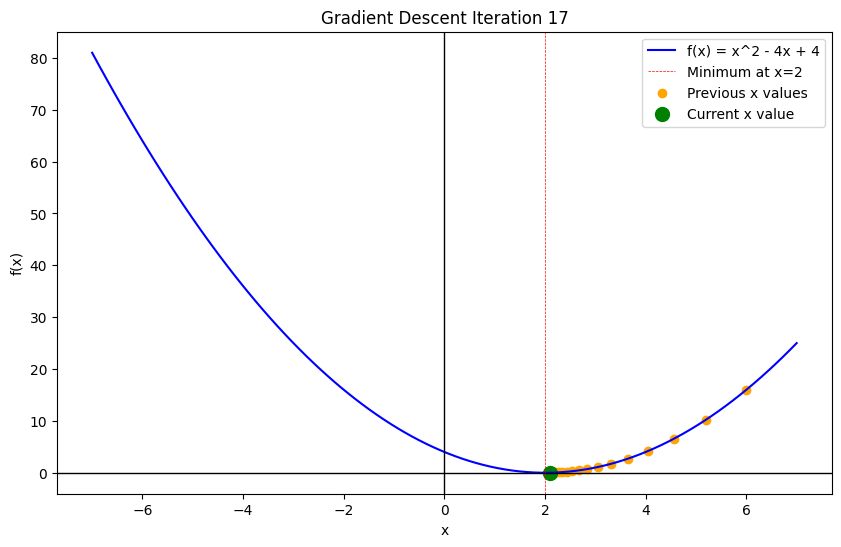

Iteration 17: x = 2.09007199254741, f(x) = 0.008112963841460541, gradient = 0.2251799813685249


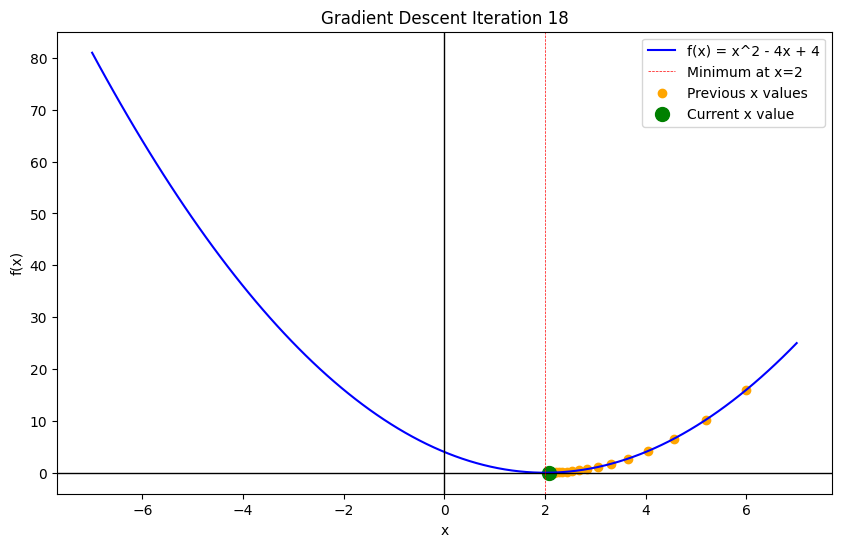

Iteration 18: x = 2.072057594037928, f(x) = 0.0051922968585351725, gradient = 0.1801439850948201


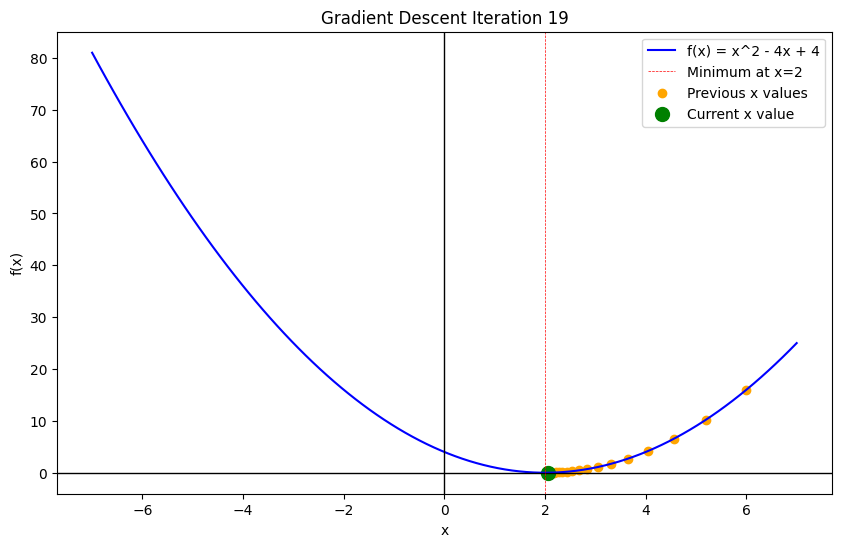

Iteration 19: x = 2.0576460752303425, f(x) = 0.0033230699894621907, gradient = 0.14411518807585644


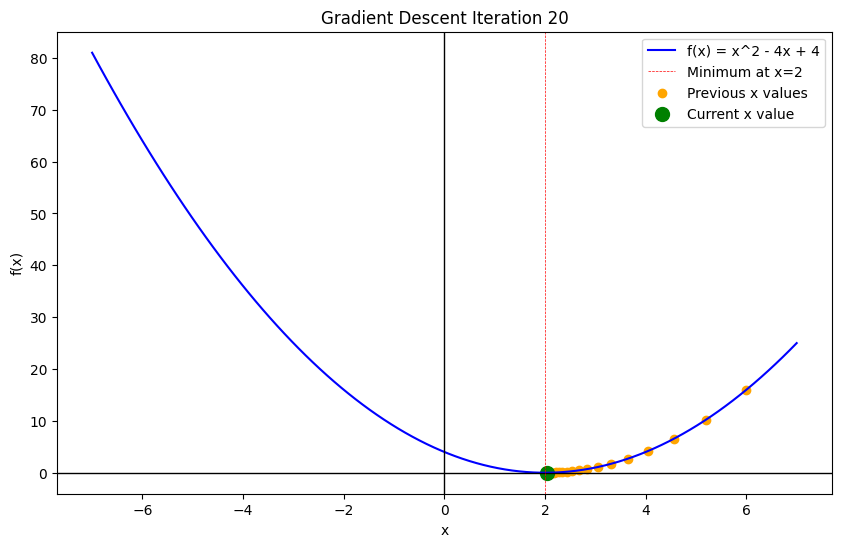

Iteration 20: x = 2.046116860184274, f(x) = 0.0021267647932559086, gradient = 0.11529215046068497


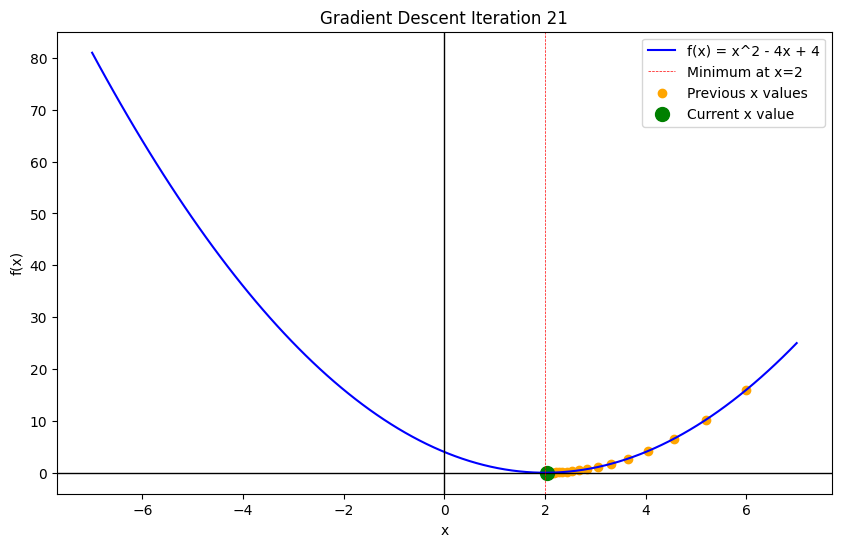

Iteration 21: x = 2.0368934881474194, f(x) = 0.0013611294676838526, gradient = 0.09223372036854816


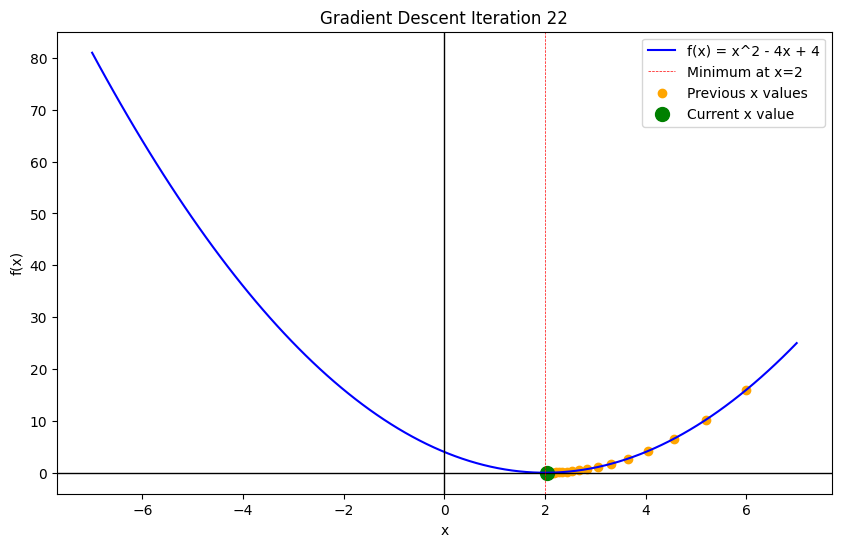

Iteration 22: x = 2.0295147905179354, f(x) = 0.0008711228593174525, gradient = 0.07378697629483888


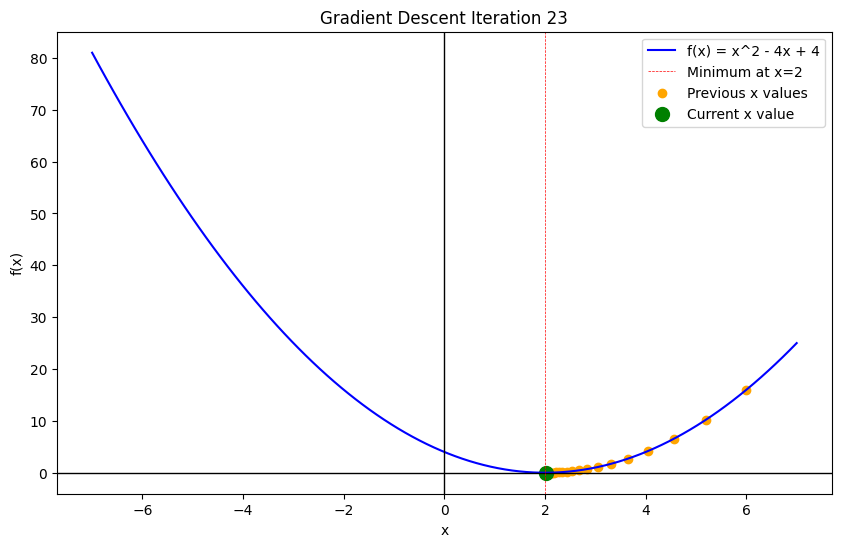

Iteration 23: x = 2.0236118324143484, f(x) = 0.0005575186299635604, gradient = 0.05902958103587075


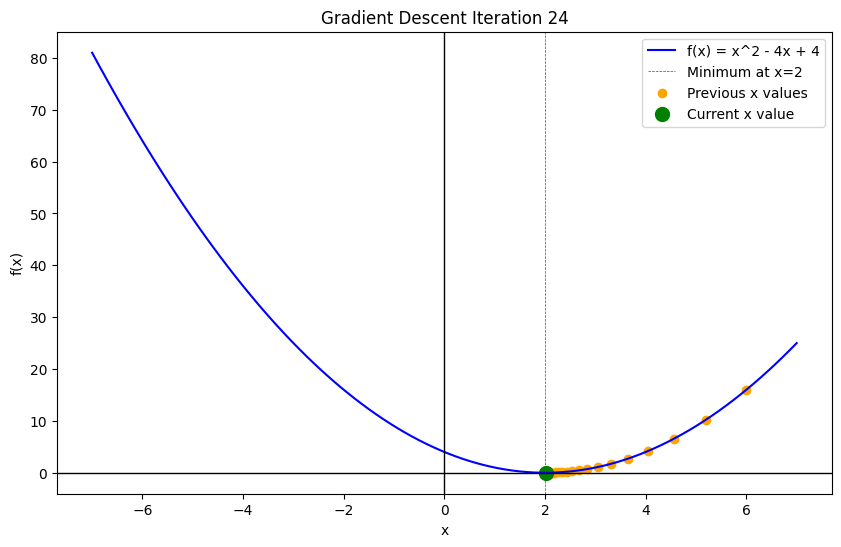

Iteration 24: x = 2.018889465931479, f(x) = 0.0003568119231767142, gradient = 0.047223664828696776


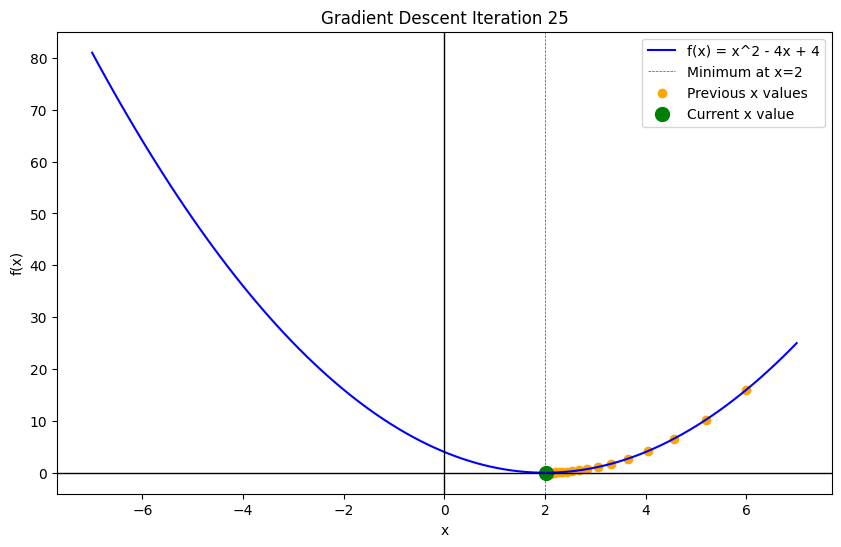

Iteration 25: x = 2.015111572745183, f(x) = 0.00022835963083256416, gradient = 0.037778931862957776


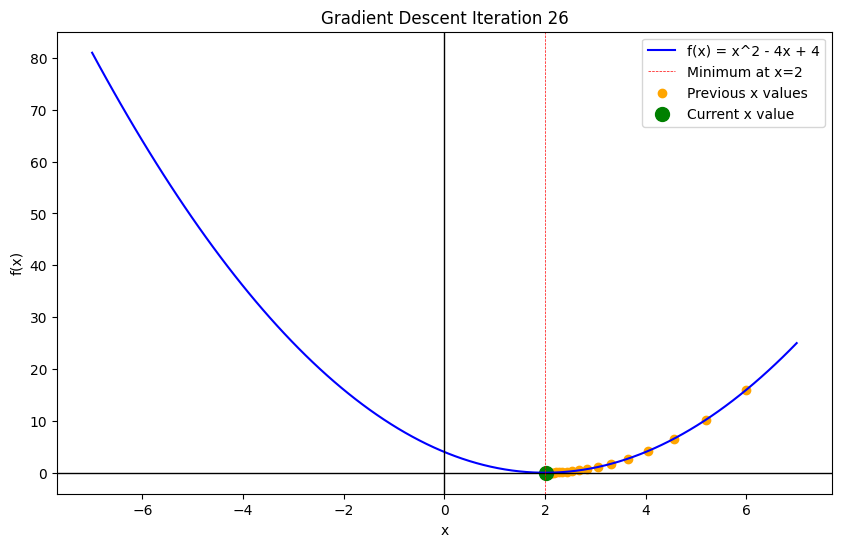

Iteration 26: x = 2.0120892581961463, f(x) = 0.00014615016373298317, gradient = 0.030223145490365866


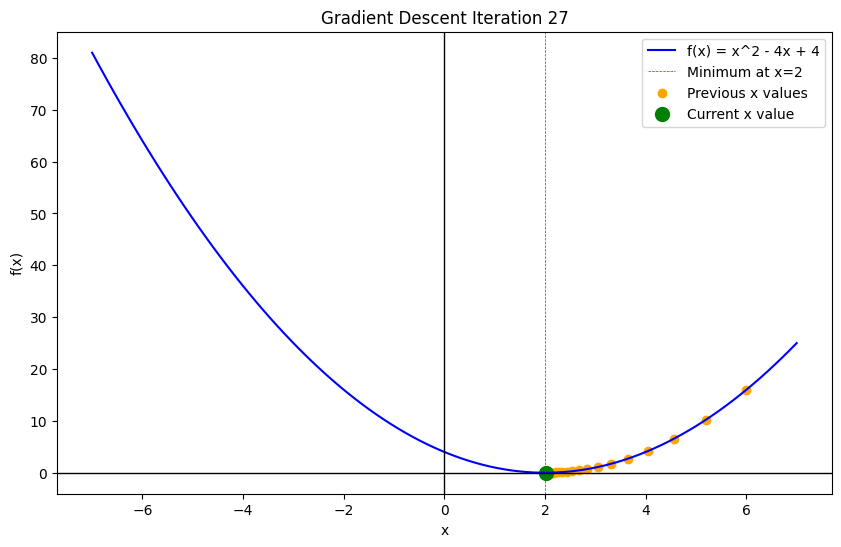

Iteration 27: x = 2.009671406556917, f(x) = 9.353610478957108e-05, gradient = 0.024178516392292515


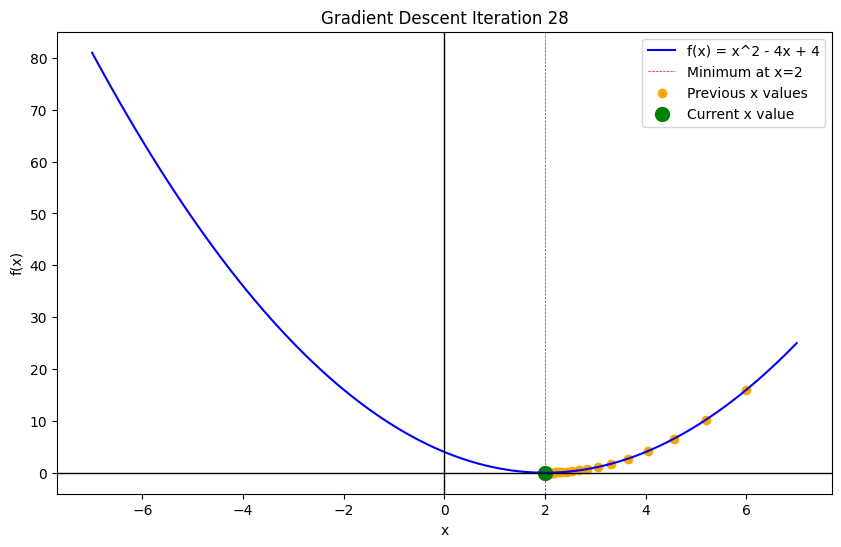

Iteration 28: x = 2.0077371252455336, f(x) = 5.9863107065183385e-05, gradient = 0.019342813113834012


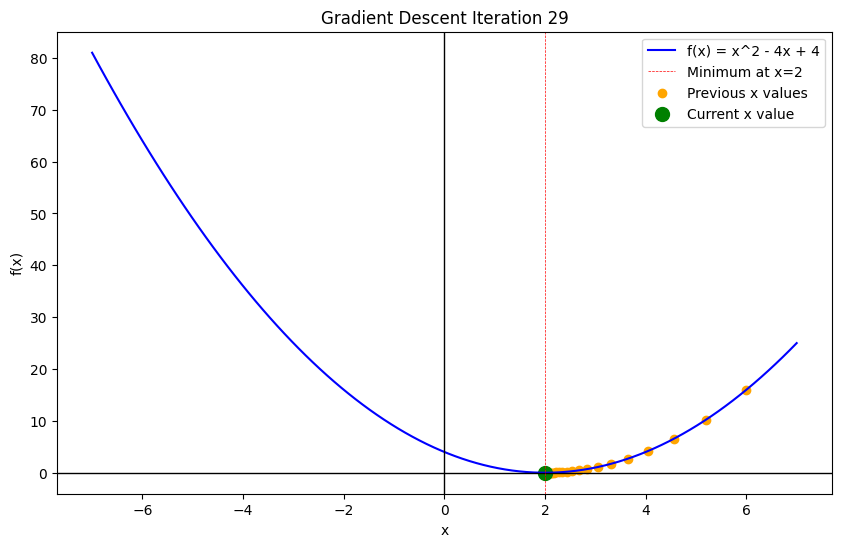

Iteration 29: x = 2.006189700196427, f(x) = 3.8312388521255514e-05, gradient = 0.01547425049106721


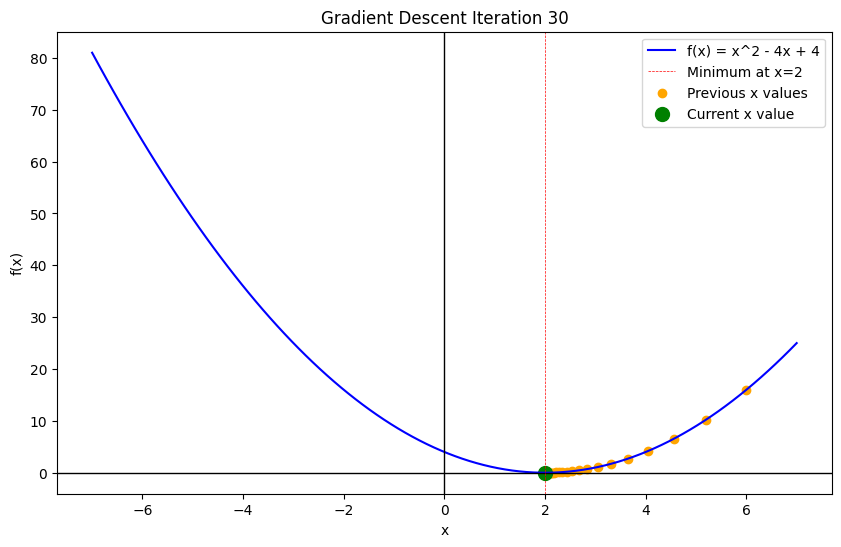

Iteration 30: x = 2.004951760157142, f(x) = 2.451992865371011e-05, gradient = 0.012379400392854123


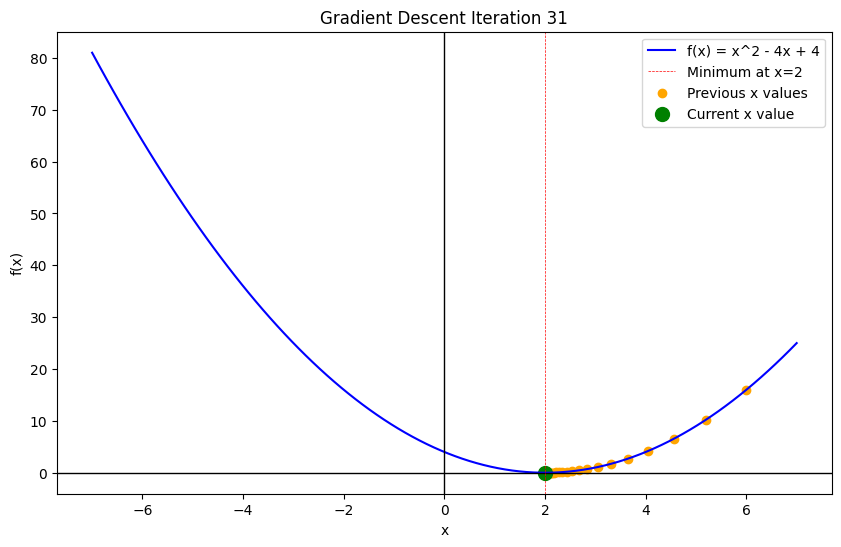

Iteration 31: x = 2.0039614081257136, f(x) = 1.5692754338658688e-05, gradient = 0.009903520314283654


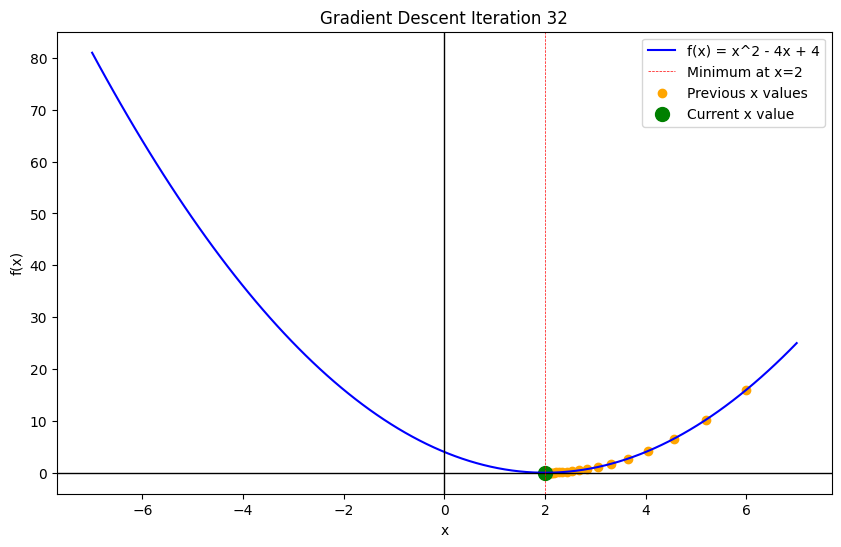

Iteration 32: x = 2.0031691265005707, f(x) = 1.004336277699025e-05, gradient = 0.0079228162514271


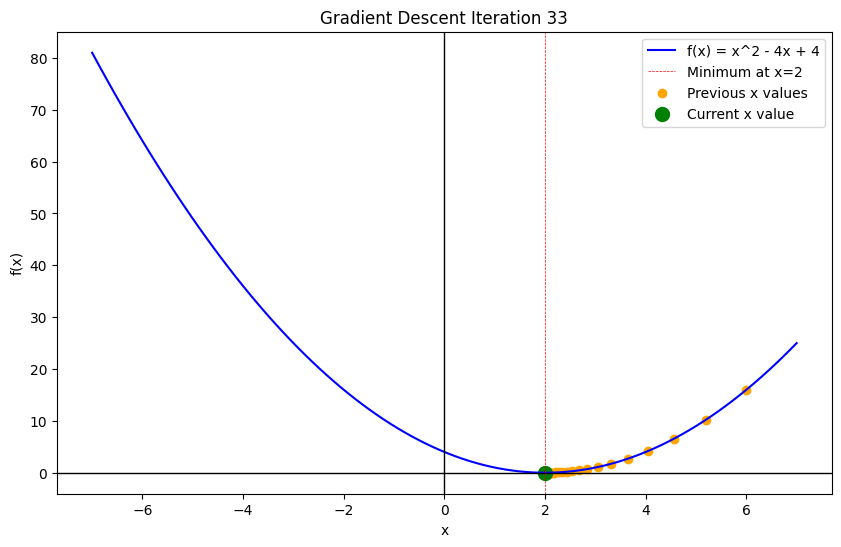

Iteration 33: x = 2.0025353012004565, f(x) = 6.427752176740853e-06, gradient = 0.006338253001141325


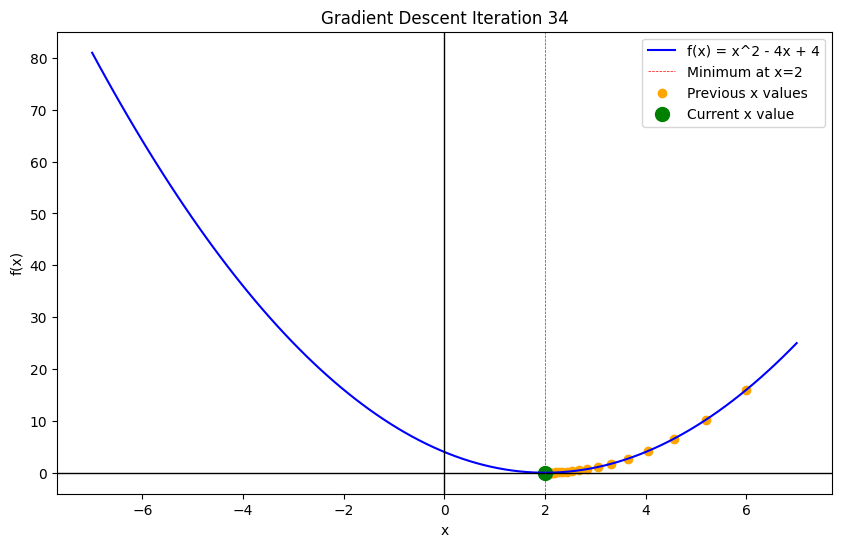

Iteration 34: x = 2.002028240960365, f(x) = 4.113761392865456e-06, gradient = 0.00507060240091306


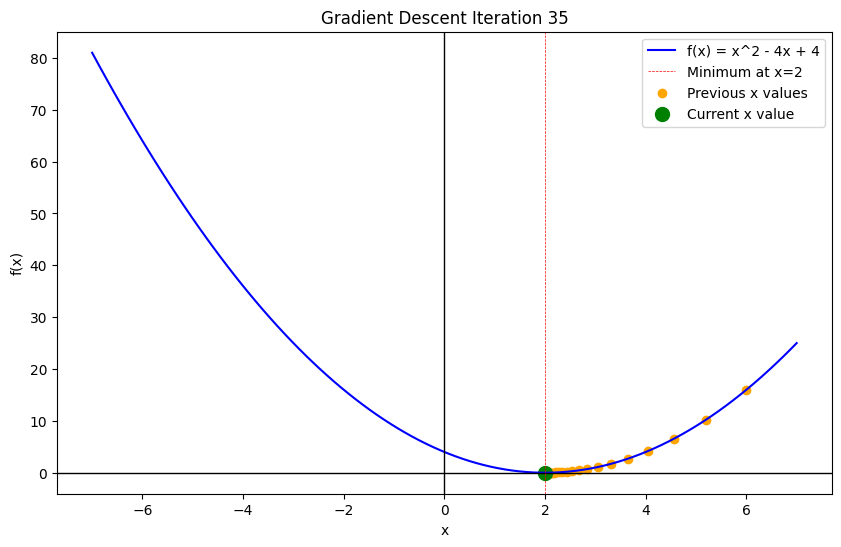

2.001622592768292

In [11]:
gradient_descent(f, f_derivative, initial_x=6)

**Problem 2**

Vi kan ge funktionen ytterligare en input, learning rate. I klassen gick vi igenom att learning rate är "hur mycket" vi backar i gradientens riktning (dvs, hur snabbt vi närmare oss det optimala värdet av x) vid varje iteration. 

Välj återigen x=6 som startgissning, och testa därefter att köra igenom funktionen för följande värden på learning rate: 

[0.1, 0.01, 0,001]

Vad händer? Hur många iterationen krävs i varje fall för att slutföra funktionen?

Tips: du kan manuellt avbryta funktionen om det tar för lång tid...


In [ ]:
gradient_descent(f, f_derivative, learning_rate=0.001, initial_x=6)

**Problem 3**


Vi har i uppgiften ovan testat vad som händer om man har relativt små värden på learning rate. Nu ska vi testa motsatsen, dvs lite större värden på learning rate.

Kör funktionen igen, men x=6 som startgissning, men denna gång testa följande learning rates:

[0.8, 1, 1.2]

Vad händer? 

Återigen, du kan manuellt abryta funktionen om det tar för lång tid...

In [ ]:
gradient_descent(f, f_derivative, learning_rate=0.8, initial_x=6)

**Problem 4**

Testa runt för fler värden på learning rate. 

Blir det som du förväntar dig?

Vad kan du dra för slutsatser av problem 1-3?

**Problem 5**

Plotta nu funktionen $f(x) = x^4 - 6x^2 + 4x + 12$. 

Hur ser den ut, generellt?

Vad tror du händer om vi hade försökt köra Gradient Descent på funktionen du plottade ovan? Vad förutser du?

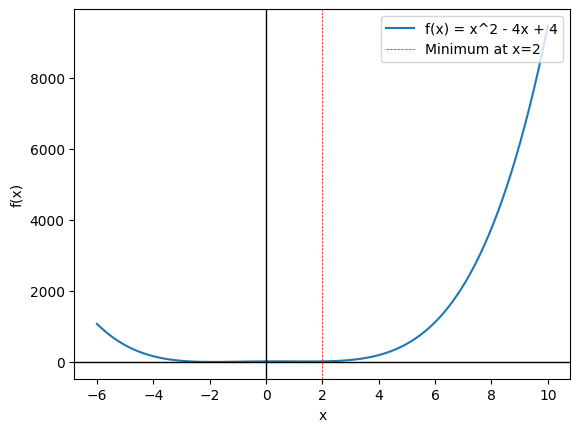

In [14]:
def f(x):
    return x**4 - 6*x**2 + 4*x + 12
def f_derivative(x):
    return 2*x - 4

# Visualize the function
x_values = np.linspace(-6, 10, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x) = x^2 - 4x + 4')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.axvline(2, color='red', lw=0.5, ls='--', label='Minimum at x=2')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper right')
plt.show()

**Problem 6**

Anta att vi nu har

$f(x) = sin(2x) + x$ 

 - Kolla upp derivatan $f'(x)$ av denna funktion online (ex via wolframalpha.com) och skriv ner den. 
 - Skriv därefter ned iterationsformeln för x i gradient descent, med hjälp av derivatan.

Vad händer om vi skulle kört gradient descent på denna funktion? Förklara.

In [19]:
def f(x):
    return np.sin(2 * x) + x

def f_derivative(x):
    return 2 * np.cos(2 * x) + 1

d/dx(x + sin(2 x)) = 2 cos(2 x) + 1

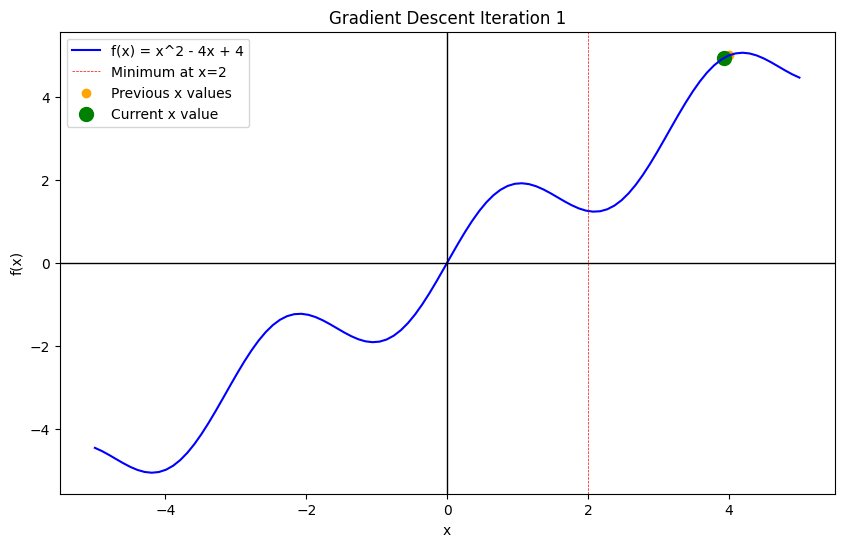

Iteration 1: x = 3.9291000067617228, f(x) = 4.929091109411907, gradient = 0.7089999323827729


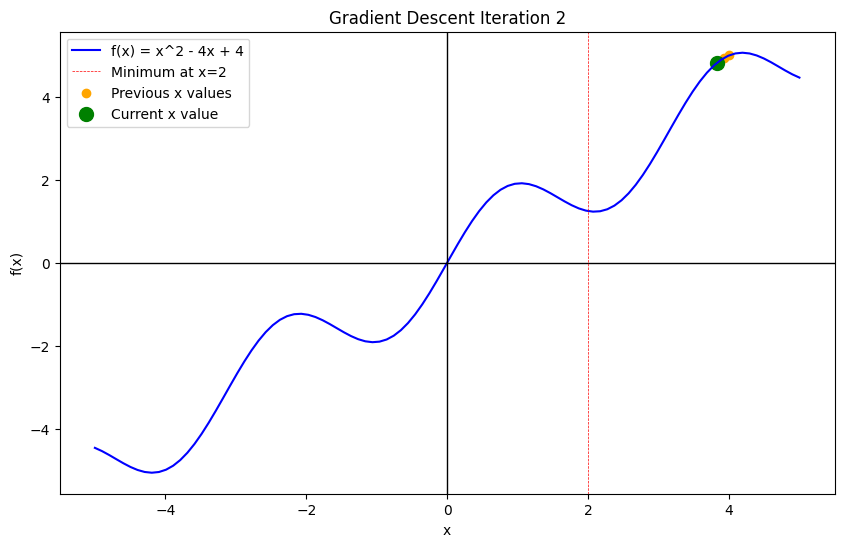

Iteration 2: x = 3.829943680169354, f(x) = 4.81116644675774, gradient = 0.9915632659236889


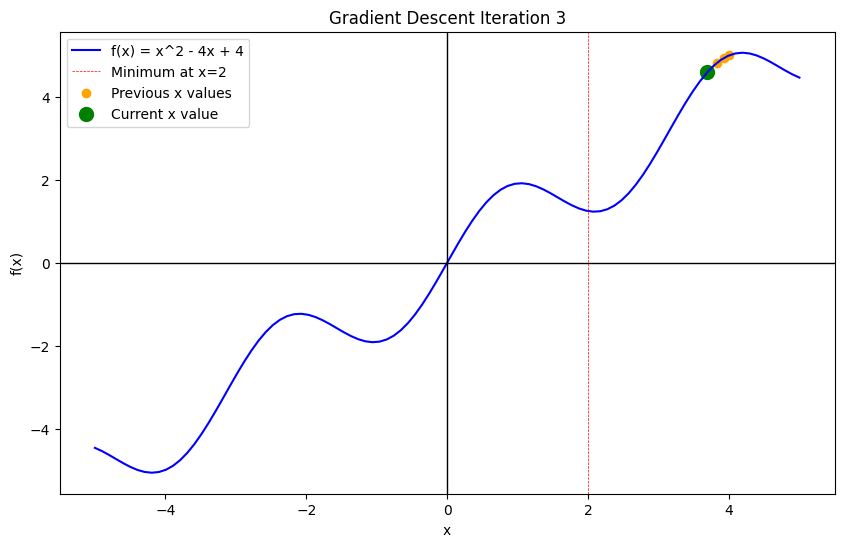

Iteration 3: x = 3.691368101195794, f(x) = 4.582371659198046, gradient = 1.3857557897355974


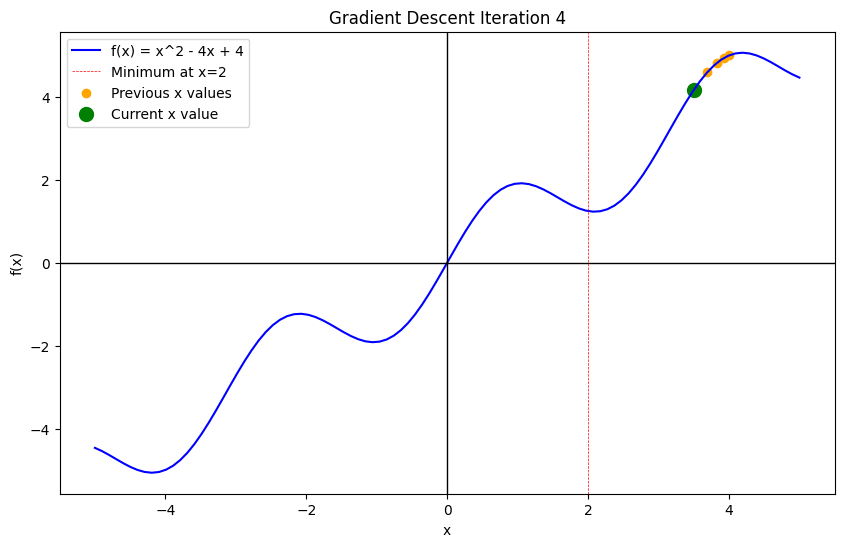

Iteration 4: x = 3.500568836963681, f(x) = 4.158412705266519, gradient = 1.9079926423211329


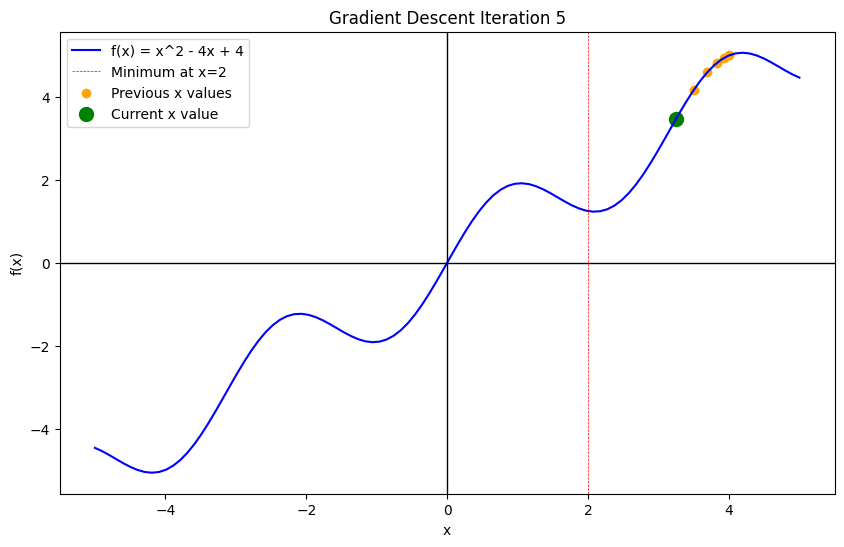

Iteration 5: x = 3.249937970945277, f(x) = 3.4649368037634547, gradient = 2.506308660184038


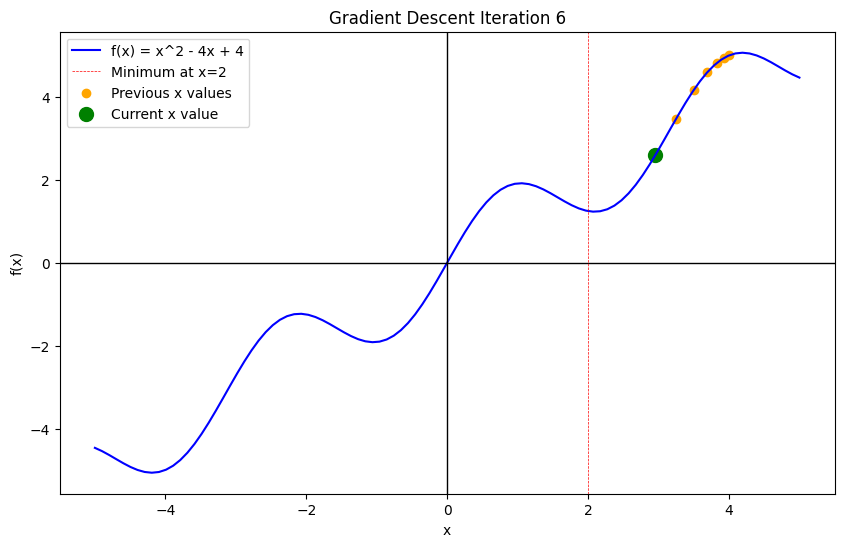

Iteration 6: x = 2.95461510982689, f(x) = 2.589315079541239, gradient = 2.9532286111838744


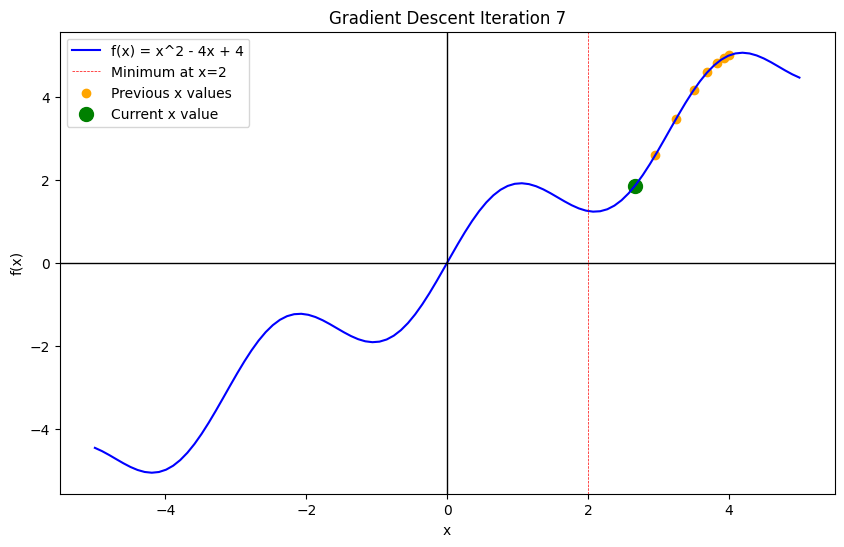

Iteration 7: x = 2.668437142508165, f(x) = 1.8571729835764752, gradient = 2.8617796731872467


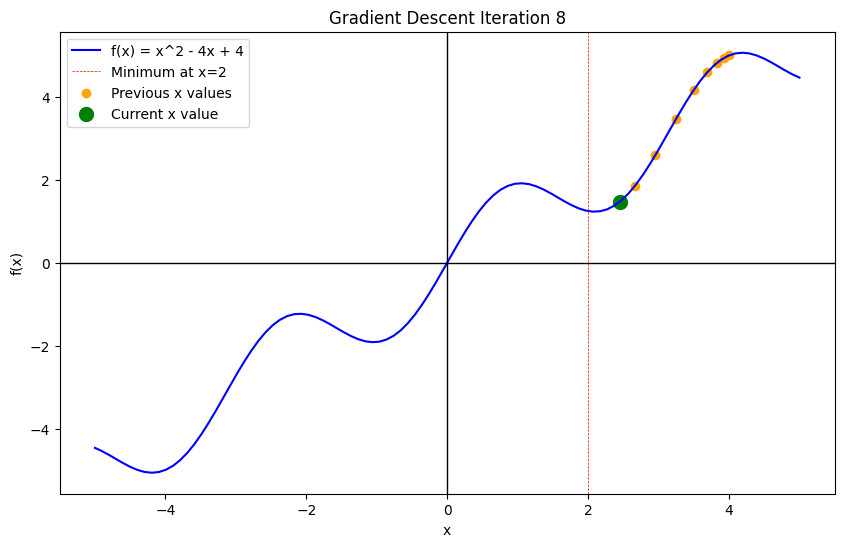

Iteration 8: x = 2.45150118320858, f(x) = 1.4696129762281531, gradient = 2.1693595929958542


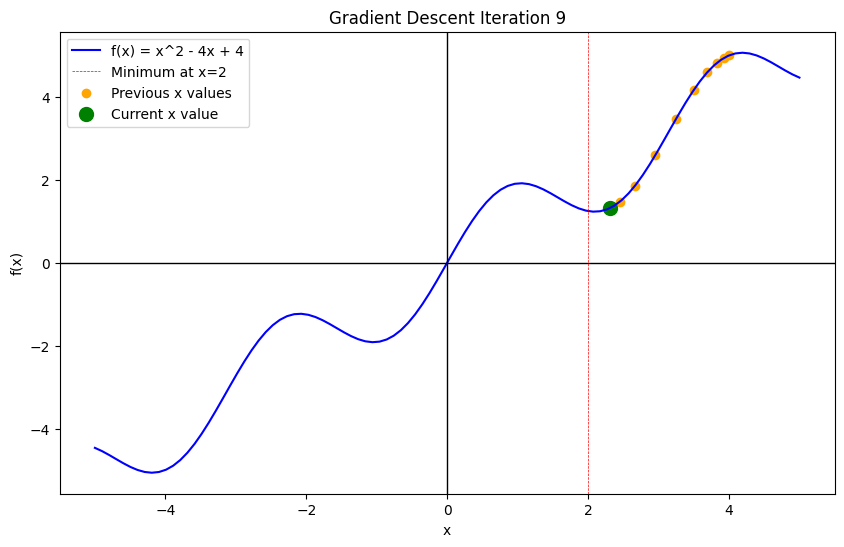

Iteration 9: x = 2.3136089417901773, f(x) = 1.3172338075942527, gradient = 1.378922414184026


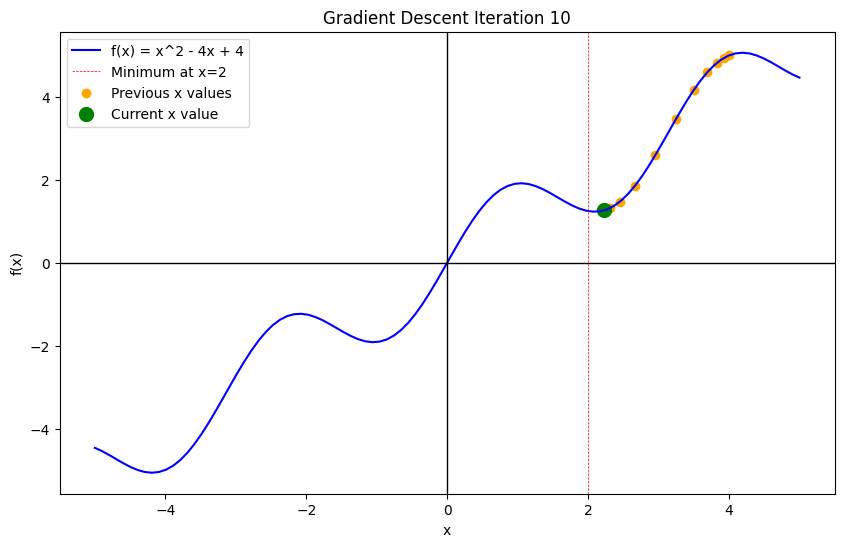

Iteration 10: x = 2.2306225739197996, f(x) = 1.2619937746874412, gradient = 0.8298636787037761


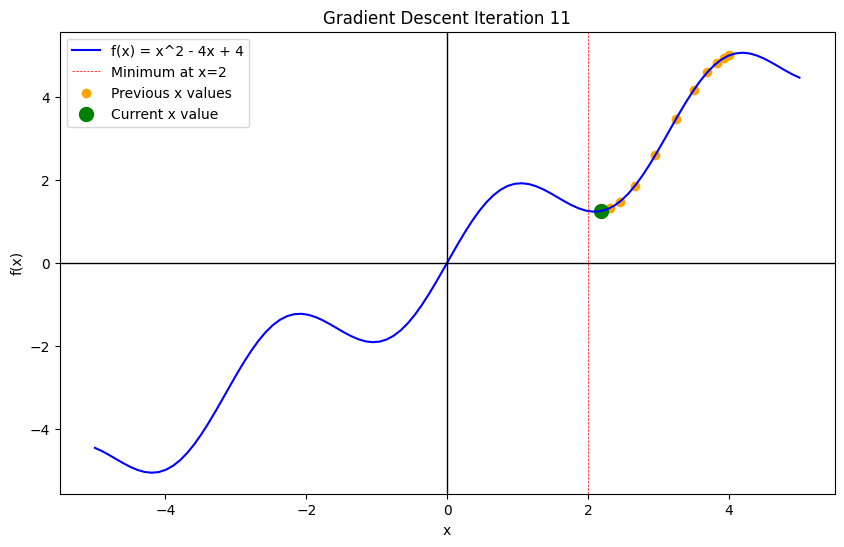

Iteration 11: x = 2.1803249880654643, f(x) = 1.2415499960582714, gradient = 0.5029758585433513


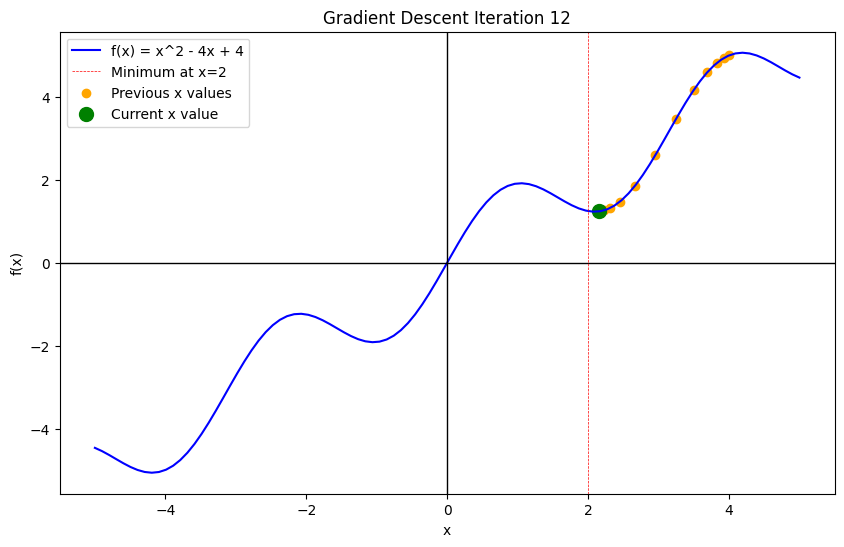

Iteration 12: x = 2.1492311603236574, f(x) = 1.233682607060444, gradient = 0.310938277418067


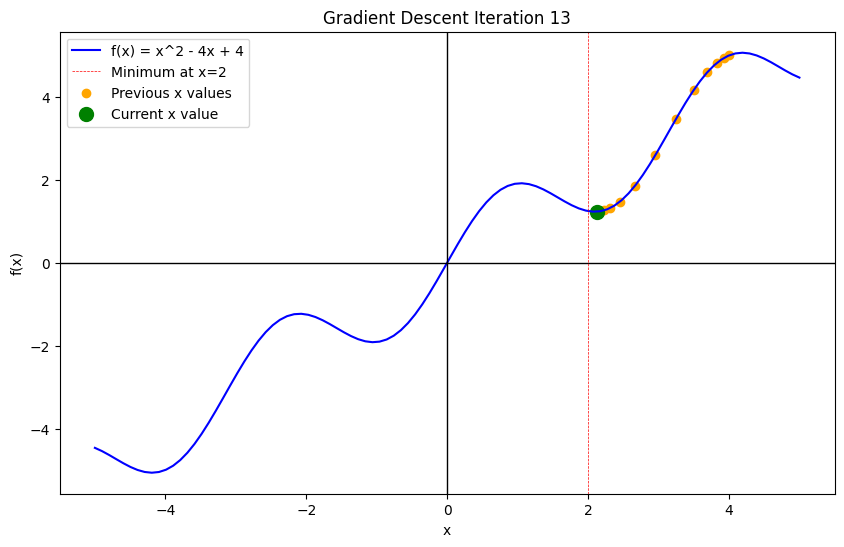

Iteration 13: x = 2.129672653750281, f(x) = 1.2305536129980585, gradient = 0.19558506573376677


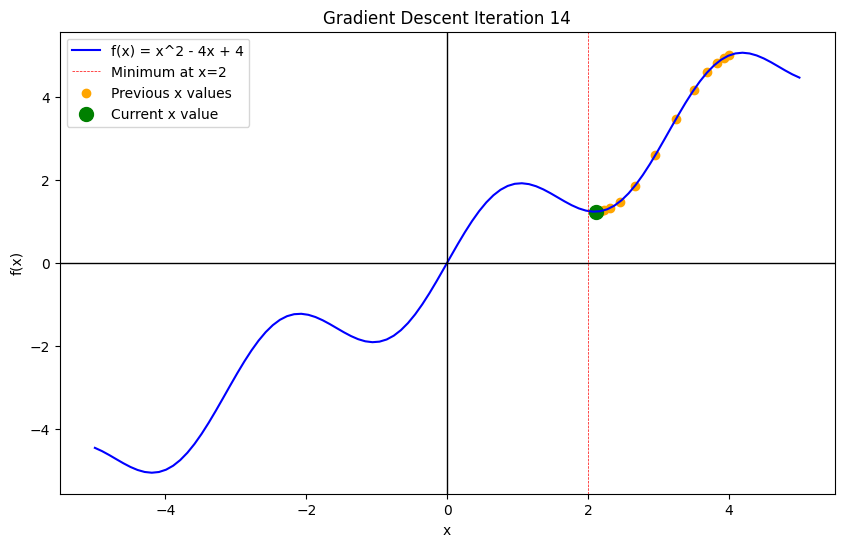

Iteration 14: x = 2.117213490062668, f(x) = 1.2292793041356296, gradient = 0.12459163687612895


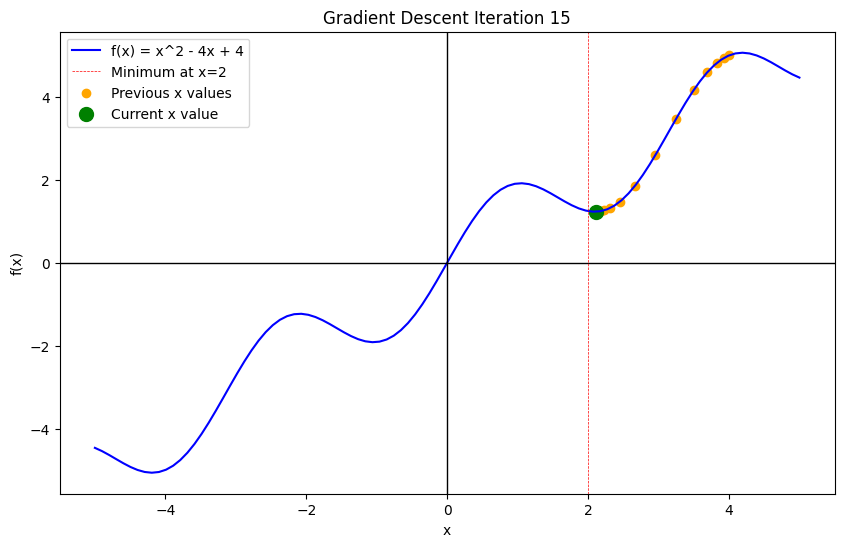

Iteration 15: x = 2.1092075945394413, f(x) = 1.228751866527616, gradient = 0.08005895523226525


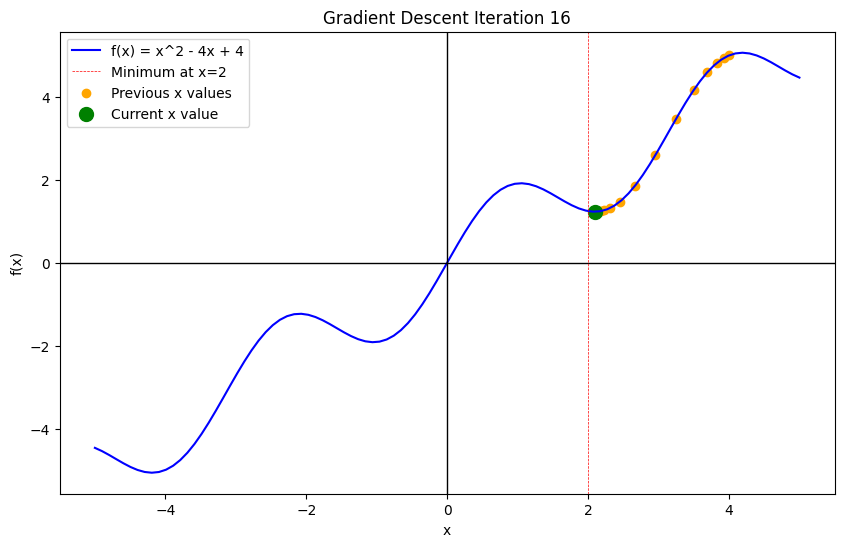

Iteration 16: x = 2.1040332684914183, f(x) = 1.2285311880557042, gradient = 0.051743260480229036


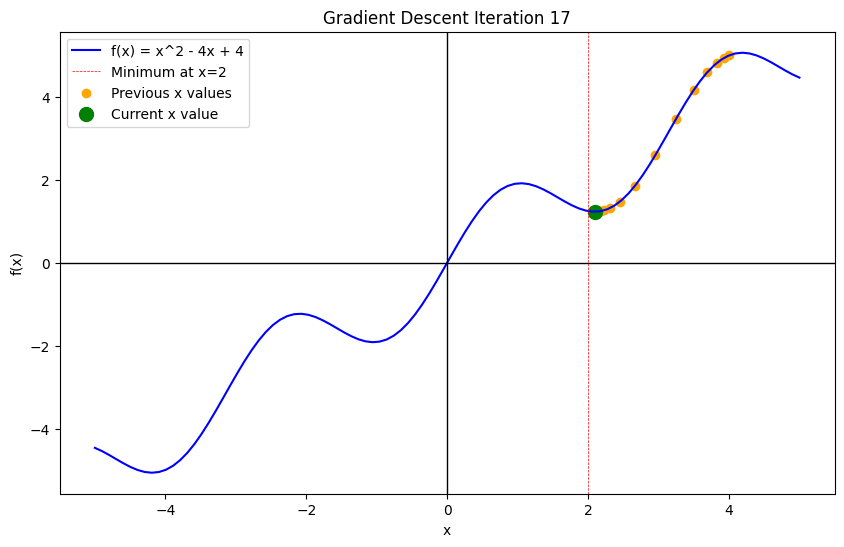

Iteration 17: x = 2.1006761383065755, f(x) = 1.2284381947562855, gradient = 0.033571301848426716


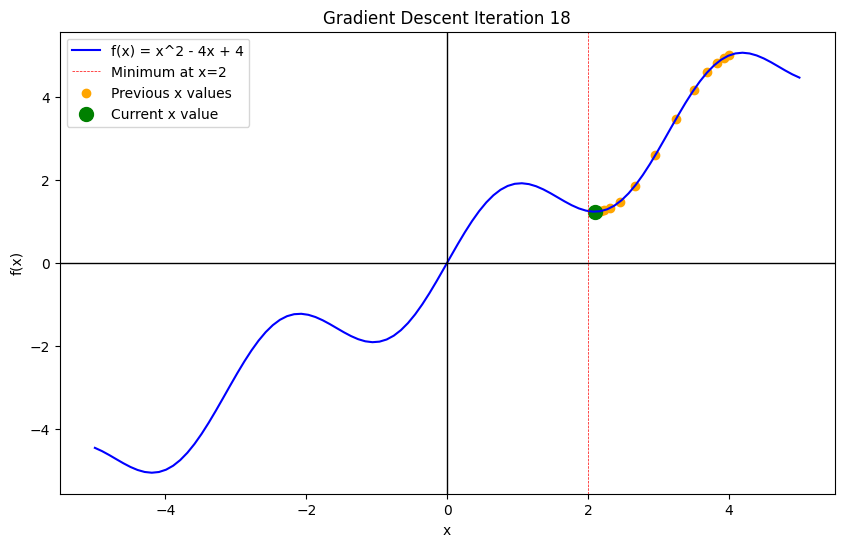

Iteration 18: x = 2.0984924906882014, f(x) = 1.2283988229977794, gradient = 0.021836476183739073


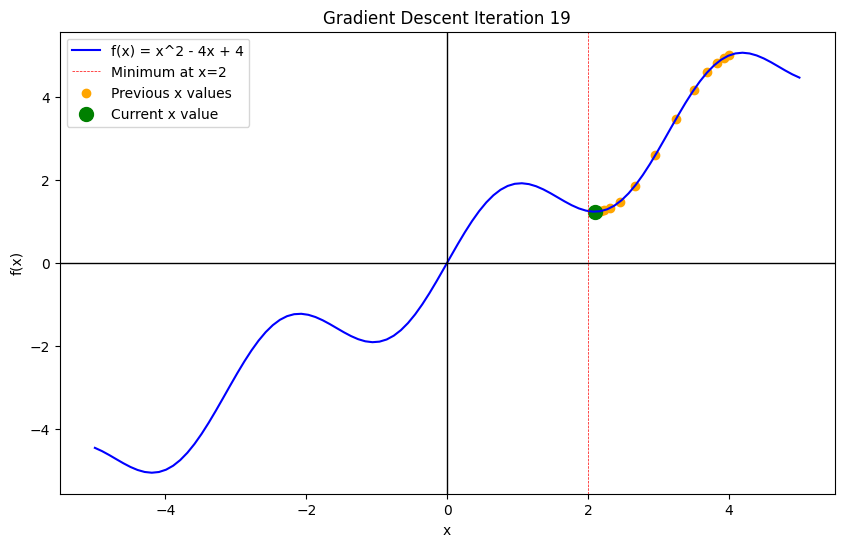

Iteration 19: x = 2.097069771933939, f(x) = 1.2283821021793848, gradient = 0.014227187542627973


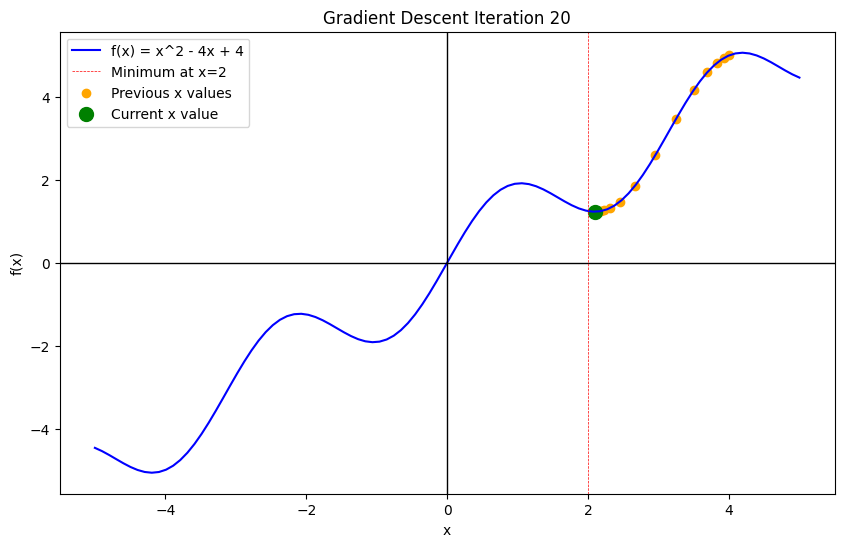

Iteration 20: x = 2.096141812877164, f(x) = 1.228374986638896, gradient = 0.009279590567747076


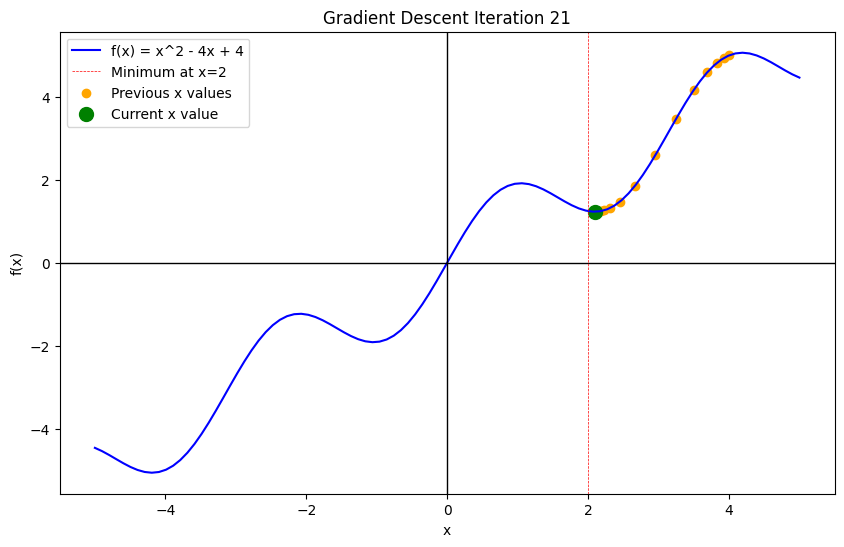

Iteration 21: x = 2.09553612564814, f(x) = 1.2283719546140905, gradient = 0.006056872290243098


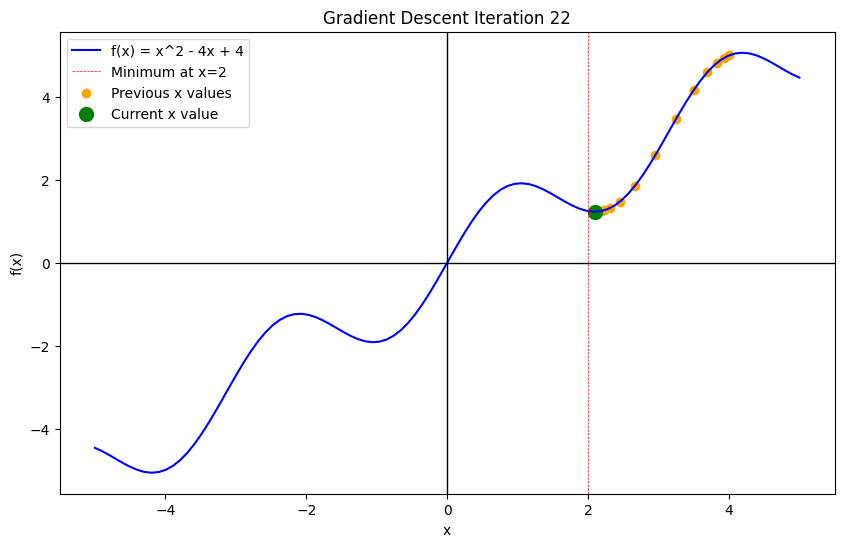

np.float64(2.095140603554473)

In [20]:
gradient_descent(f, f_derivative, initial_x=4)

**Problem 7**

Ett problem för gradient descent ärdet s.k. problemet med globala- och lokala minimum. 

Hur stort problem är detta? Sök efter referenser på nätet (ej ChatGPT) och förklara med egna ord vad detta innebär, hur det påverkar gradient gescent och hur man kan försöka kringgå det.